<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/notebooks/VGG15_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

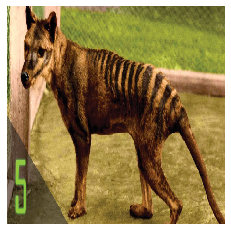

In [4]:
from PIL import Image
import requests
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

model = VGG16(weights='imagenet')
model.summary()

img_url = 'https://www.humanesociety.org/sites/default/files/styles/768x326/public/2018/08/kitten-440379.jpg'
img_url = 'https://www.petspoint.ru/upload/resize_cache/iblock/cce/800_600_137bca93b304a78871529b63cfc9265fe/cce4ed33f7b6493971291dbfff5bbdfc.jpg'
img_url = 'https://i.ytimg.com/vi/Y77CiMTJPuk/maxresdefault.jpg'
img = Image.open(requests.get(img_url, stream=True).raw)
img = img.resize((224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

plt.figure()
plt.imshow(img)
plt.axis('off')

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])
# Predicted: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]